In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from ydata_profiling import ProfileReport

In [2]:
# pip install ydata_profiling 
# pip install ipywidgets

In [2]:
file_path = r"C:\Users\Ivan\Documents\Data Analytics\Parte 5 Proyecto y Presentación\Sprint 10 Proyecto Final\MERCAMADRID\volpre2024.csv"
df = pd.read_csv(file_path, delimiter=';')
df.head()

# tal vez mejor trabajar con 2023 dataset

,Fecha Desde,Fecha Hasta,Código Variedad,Descripción Variedad,Origen,Descripción Origen,Kilos,Precio Más Frecuente,Precio Máximo,Precio Mínimo
0,20240101,20240131,CA 0101,VACUNO CANAL,1,ALAVA,45830,"5,9","5,91","5,89"
1,20240101,20240131,CA 0101,VACUNO CANAL,5,AVILA,21140,"5,91","5,91","5,91"
2,20240101,20240131,CA 0101,VACUNO CANAL,8,BARCELONA,137340,"5,91","5,91","5,9"
3,20240101,20240131,CA 0101,VACUNO CANAL,9,BURGOS,42456,"5,9","5,91","5,89"
4,20240101,20240131,CA 0101,VACUNO CANAL,10,CACERES,2230424,"5,9","5,91","5,89"


# 1. Limpieza de datos


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27579 entries, 0 to 27578
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Fecha Desde            27579 non-null  object
 1    Fecha Hasta           27579 non-null  object
 2    Código Variedad       27579 non-null  object
 3    Descripción Variedad  27579 non-null  object
 4    Origen                27579 non-null  object
 5    Descripción Origen    27579 non-null  object
 6    Kilos                 27579 non-null  object
 7    Precio Más Frecuente  27579 non-null  object
 8    Precio Máximo         27579 non-null  object
 9    Precio Mínimo         27579 non-null  object
dtypes: object(10)
memory usage: 2.1+ MB


Todas las columnas estan en formato object hará falta editarlo.

In [4]:
# Valores nulos
null_values_count = df.isnull().sum()
null_values_count

Fecha Desde              0
 Fecha Hasta             0
 Código Variedad         0
 Descripción Variedad    0
 Origen                  0
 Descripción Origen      0
 Kilos                   0
 Precio Más Frecuente    0
 Precio Máximo           0
 Precio Mínimo           0
dtype: int64

No hay valores nulos

In [5]:
# eliminar espacios en nombre de columnas
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()
df.columns

Index(['fecha_desde', 'fecha_hasta', 'código_variedad', 'descripción_variedad',
       'origen', 'descripción_origen', 'kilos', 'precio_más_frecuente',
       'precio_máximo', 'precio_mínimo'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27579 entries, 0 to 27578
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   fecha_desde           27579 non-null  object
 1   fecha_hasta           27579 non-null  object
 2   código_variedad       27579 non-null  object
 3   descripción_variedad  27579 non-null  object
 4   origen                27579 non-null  object
 5   descripción_origen    27579 non-null  object
 6   kilos                 27579 non-null  object
 7   precio_más_frecuente  27579 non-null  object
 8   precio_máximo         27579 non-null  object
 9   precio_mínimo         27579 non-null  object
dtypes: object(10)
memory usage: 2.1+ MB


In [7]:
# Convertimos importe a float

df['precio_más_frecuente'] = df['precio_más_frecuente'].astype(str).str.replace(',', '.').str.strip()

df['precio_más_frecuente'] = pd.to_numeric(df['precio_más_frecuente'], errors = 'coerce') 

df['precio_más_frecuente'].head()


0    5.90
1    5.91
2    5.91
3    5.90
4    5.90
Name: precio_más_frecuente, dtype: float64

In [8]:
df['precio_máximo'] = df['precio_máximo'].astype(str).str.replace(',', '.').str.strip()

df['precio_máximo'] = pd.to_numeric(df['precio_máximo'], errors = 'coerce')  # Tengo un valor en el 3015 nan

df['precio_máximo'].head()

0    5.91
1    5.91
2    5.91
3    5.91
4    5.91
Name: precio_máximo, dtype: float64

In [9]:
df['precio_mínimo'] = df['precio_mínimo'].astype(str).str.replace(',', '.').str.strip()

df['precio_mínimo'] = pd.to_numeric(df['precio_mínimo'], errors = 'coerce')  # Tengo un valor en el 3015 nan

df['precio_mínimo'].head()

0    5.89
1    5.91
2    5.90
3    5.89
4    5.89
Name: precio_mínimo, dtype: float64

In [10]:
df[df.isnull().any(axis=1)]  # me replicaron los encabezados

,fecha_desde,fecha_hasta,código_variedad,descripción_variedad,origen,descripción_origen,kilos,precio_más_frecuente,precio_máximo,precio_mínimo
3015,Fecha Desde,Fecha Hasta,Código Variedad,Descripción Variedad,Origen,Descripción Origen,Kilos,NaN,NaN,NaN
5767,Fecha Desde,Fecha Hasta,Código Variedad,Descripción Variedad,Origen,Descripción Origen,Kilos,NaN,NaN,NaN
8641,Fecha Desde,Fecha Hasta,Código Variedad,Descripción Variedad,Origen,Descripción Origen,Kilos,NaN,NaN,NaN
11701,Fecha Desde,Fecha Hasta,Código Variedad,Descripción Variedad,Origen,Descripción Origen,Kilos,NaN,NaN,NaN
14774,Fecha Desde,Fecha Hasta,Código Variedad,Descripción Variedad,Origen,Descripción Origen,Kilos,NaN,NaN,NaN
17979,Fecha Desde,Fecha Hasta,Código Variedad,Descripción Variedad,Origen,Descripción Origen,Kilos,NaN,NaN,NaN
21197,Fecha Desde,Fecha Hasta,Código Variedad,Descripción Variedad,Origen,Descripción Origen,Kilos,NaN,NaN,NaN
24225,Fecha Desde,Fecha Hasta,Código Variedad,Descripción Variedad,Origen,Descripción Origen,Kilos,NaN,NaN,NaN


In [11]:
null_values_count = df.isnull().sum()
null_values_count


fecha_desde             0
fecha_hasta             0
código_variedad         0
descripción_variedad    0
origen                  0
descripción_origen      0
kilos                   0
precio_más_frecuente    8
precio_máximo           8
precio_mínimo           8
dtype: int64

In [12]:
# Eliminar filas con nulos
df = df[df.notnull()]

In [13]:
# comprobación que se eliminaron las filas con nulos
null_values_count = df.isnull().sum() 
null_values_count

fecha_desde             0
fecha_hasta             0
código_variedad         0
descripción_variedad    0
origen                  0
descripción_origen      0
kilos                   0
precio_más_frecuente    8
precio_máximo           8
precio_mínimo           8
dtype: int64

In [14]:
(df['precio_más_frecuente'] == 0).any()  # Aqui le pregunto si hay algun valor = 0 me dice que si

np.True_

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27579 entries, 0 to 27578
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fecha_desde           27579 non-null  object 
 1   fecha_hasta           27579 non-null  object 
 2   código_variedad       27579 non-null  object 
 3   descripción_variedad  27579 non-null  object 
 4   origen                27579 non-null  object 
 5   descripción_origen    27579 non-null  object 
 6   kilos                 27579 non-null  object 
 7   precio_más_frecuente  27571 non-null  float64
 8   precio_máximo         27571 non-null  float64
 9   precio_mínimo         27571 non-null  float64
dtypes: float64(3), object(7)
memory usage: 2.1+ MB


In [16]:
# Transformación kilos a formato integer
df['kilos'].info()

# primero es necesario transformarlo en float dado que INT no admite Nan(nulos)
df['kilos'] = pd.to_numeric(df['kilos'], errors = 'coerce').astype(float) 

# eliminación de nulos
df = df.dropna()
# df['kilos'] = df['kilos'].dropna() no me funcionaba eliminar solo de una columna



<class 'pandas.core.series.Series'>
RangeIndex: 27579 entries, 0 to 27578
Series name: kilos
Non-Null Count  Dtype 
--------------  ----- 
27579 non-null  object
dtypes: object(1)
memory usage: 215.6+ KB


In [17]:
# Comprobación
df['kilos'].isnull().sum()
df[df.isnull().any(axis=1)]

,fecha_desde,fecha_hasta,código_variedad,descripción_variedad,origen,descripción_origen,kilos,precio_más_frecuente,precio_máximo,precio_mínimo


In [18]:
# Transformación definitiva a INT
df['kilos'] = df['kilos'].astype(int)
print(df['kilos'].info())
print('______________')
print(df['kilos'].head())

<class 'pandas.core.series.Series'>
Index: 27571 entries, 0 to 27578
Series name: kilos
Non-Null Count  Dtype
--------------  -----
27571 non-null  int64
dtypes: int64(1)
memory usage: 430.8 KB
None
______________
0      45830
1      21140
2     137340
3      42456
4    2230424
Name: kilos, dtype: int64


In [19]:
df.head()

,fecha_desde,fecha_hasta,código_variedad,descripción_variedad,origen,descripción_origen,kilos,precio_más_frecuente,precio_máximo,precio_mínimo
0,20240101,20240131,CA 0101,VACUNO CANAL,1,ALAVA,45830,5.90,5.91,5.89
1,20240101,20240131,CA 0101,VACUNO CANAL,5,AVILA,21140,5.91,5.91,5.91
2,20240101,20240131,CA 0101,VACUNO CANAL,8,BARCELONA,137340,5.91,5.91,5.90
3,20240101,20240131,CA 0101,VACUNO CANAL,9,BURGOS,42456,5.90,5.91,5.89
4,20240101,20240131,CA 0101,VACUNO CANAL,10,CACERES,2230424,5.90,5.91,5.89


## EN LA FILA 3015 AL CAMBIAR FORMATO SIEMPRE DA PROBLEMAS PORQUE ES EL ENCABEZADO DUPLICADO

In [20]:
# Convertir fecha a formato date
df['fecha_desde'] = pd.to_datetime(df['fecha_desde'])
df['fecha_hasta'] = pd.to_datetime(df['fecha_hasta'])

df['fecha_desde']

0       2024-01-01
1       2024-01-01
2       2024-01-01
3       2024-01-01
4       2024-01-01
           ...    
27574   2024-09-01
27575   2024-09-01
27576   2024-09-01
27577   2024-09-01
27578   2024-09-01
Name: fecha_desde, Length: 27571, dtype: datetime64[ns]

In [21]:
# Crear columna de variación de precios en el periodo trimestral
df['var_precios'] = df['precio_máximo']-df['precio_mínimo']

In [22]:
df.head()

,fecha_desde,fecha_hasta,código_variedad,descripción_variedad,origen,descripción_origen,kilos,precio_más_frecuente,precio_máximo,precio_mínimo,var_precios
0,2024-01-01,2024-01-31,CA 0101,VACUNO CANAL,1,ALAVA,45830,5.90,5.91,5.89,0.02
1,2024-01-01,2024-01-31,CA 0101,VACUNO CANAL,5,AVILA,21140,5.91,5.91,5.91,0.00
2,2024-01-01,2024-01-31,CA 0101,VACUNO CANAL,8,BARCELONA,137340,5.91,5.91,5.90,0.01
3,2024-01-01,2024-01-31,CA 0101,VACUNO CANAL,9,BURGOS,42456,5.90,5.91,5.89,0.02
4,2024-01-01,2024-01-31,CA 0101,VACUNO CANAL,10,CACERES,2230424,5.90,5.91,5.89,0.02


In [23]:
# Conocer todas las variedades que se venden
df['descripción_variedad'].nunique()

538

In [24]:
# Separar nombre de producto
df['descripción_variedad'] = df['descripción_variedad'].str.strip()

In [25]:
# Creo columna trimestre con lambda
df['trimestre'] = df['fecha_desde'].apply(
    lambda x: 1 if x.month < 4 else
              2 if x.month < 7 else
              3 if x.month < 10 else
              4
)

In [26]:
# lo mismo pero con comprehensive
df['trimestre'] = [
    1 if value.month < 4 else    
    2 if value.month < 7 else   
    3 if value.month < 10 else   
    4 for value in df['fecha_desde']
]

In [27]:
kil_tri = df.groupby('trimestre')['kilos'].sum()
kil_tri

trimestre
1    739479675
2    878514772
3    763296447
Name: kilos, dtype: int64

In [28]:
# Conocer las variedades de producto
df['descripción_variedad'].unique()

array(['VACUNO CANAL', 'VACUNO DESPIECE AÑOJO', 'VACUNO DESPIECE VACA',
       'VACUNO CASQUERIA', 'VACUNO FRESCO SIN ESPECIF', 'OVINO CANAL',
       'OVINO DESPIECE', 'OVINO FRESCO SIN ESPECIF.', 'PORCINO CANAL',
       'PORCINO DESPIECE', 'PORCINO CASQUERIA', 'PORCINO ELABORADO',
       'PORCINO PRECOCINADO', 'PORCINO FRESCO SIN ESPECI', 'HUEVOS',
       'POLLO', 'PAVO', 'CODORNIZ', 'CONEJO', 'AVICOLA ELABORADO',
       'AGUACATE HASS', 'ALBARICOQUE COMUN', 'CAQUIS',
       'CAQUI ROJO BRILLANTE', 'CAQUI SHARON', 'CASTAÑA NACIONAL',
       'CEREZAS O.V.', 'CIRUELAS GOLDEN', 'CIRUELAS MORADAS', 'COCOS',
       'CHIRIMOYAS', 'DATILES', 'DATIL MEDJOUL', 'FRESON', 'GRANADAS',
       'HIGOS SECOS NACIONALES', 'LIMON PRIMAFIORI',
       'MANDARINAS CLEMENULES', 'MANDARINAS CLEMENVILLES',
       'MANDARINA NADORCOTT', 'MANDARINA ORRI', 'MANZANAS GOLDEN',
       'MANZANAS STARKING', 'MANZANAS REINETA', 'MANZANAS VERDE DONCELLA',
       'MANZANA GRANNY SMITH', 'MANZANA ROYAL GALA', 'MANZANA F

Se observa que de un mismo producto hay varias variedades (Ejemplo: producto Vacuno, variedades Canal,Despiece,etc...) Para poder comparar la cantidad de compras de cada producto se optara por agrupar en una nueva columna todas las variedades en una única categoría.

In [29]:
# Función para crear
def agregar_tipo_general(df, columna_descripcion):
    """
    Agrega una columna de tipo general basada en la primera palabra de la columna de descripción.

    Args:
        df (pd.DataFrame): DataFrame que contiene la columna de descripción.
        columna_descripcion (str): Nombre de la columna con las descripciones específicas.

    Returns:
        pd.DataFrame: DataFrame con una nueva columna 'tipo_general'.
    """
    # Crear la nueva columna basada en la primera palabra de la descripción
    df['tipo_general'] = df[columna_descripcion].str.split().str[0].str.upper()
    return df

# Aplicar la función
df = agregar_tipo_general(df, 'descripción_variedad')

# Verificar el resultado
print(df[['descripción_variedad', 'tipo_general']].head())

  descripción_variedad tipo_general
0         VACUNO CANAL       VACUNO
1         VACUNO CANAL       VACUNO
2         VACUNO CANAL       VACUNO
3         VACUNO CANAL       VACUNO
4         VACUNO CANAL       VACUNO


In [30]:
df.head()

,fecha_desde,fecha_hasta,código_variedad,descripción_variedad,origen,descripción_origen,kilos,precio_más_frecuente,precio_máximo,precio_mínimo,var_precios,trimestre,tipo_general
0,2024-01-01,2024-01-31,CA 0101,VACUNO CANAL,1,ALAVA,45830,5.90,5.91,5.89,0.02,1,VACUNO
1,2024-01-01,2024-01-31,CA 0101,VACUNO CANAL,5,AVILA,21140,5.91,5.91,5.91,0.00,1,VACUNO
2,2024-01-01,2024-01-31,CA 0101,VACUNO CANAL,8,BARCELONA,137340,5.91,5.91,5.90,0.01,1,VACUNO
3,2024-01-01,2024-01-31,CA 0101,VACUNO CANAL,9,BURGOS,42456,5.90,5.91,5.89,0.02,1,VACUNO
4,2024-01-01,2024-01-31,CA 0101,VACUNO CANAL,10,CACERES,2230424,5.90,5.91,5.89,0.02,1,VACUNO


In [31]:
# Columna categoría producto (hay varias categorias duplicadas una en singular y la otra en plural)
df['tipo_general'].unique()

array(['VACUNO', 'OVINO', 'PORCINO', 'HUEVOS', 'POLLO', 'PAVO',
       'CODORNIZ', 'CONEJO', 'AVICOLA', 'AGUACATE', 'ALBARICOQUE',
       'CAQUIS', 'CAQUI', 'CASTAÑA', 'CEREZAS', 'CIRUELAS', 'COCOS',
       'CHIRIMOYAS', 'DATILES', 'DATIL', 'FRESON', 'GRANADAS', 'HIGOS',
       'LIMON', 'MANDARINAS', 'MANDARINA', 'MANZANAS', 'MANZANA',
       'MELOCOTON', 'MELONES', 'MEMBRILLOS', 'NARANJAS', 'NARANJA',
       'NECTARINA', 'NUECES', 'PERAS', 'PIÑA', 'PLATANOS', 'PLATANO',
       'POMELO', 'SANDIA', 'UVA', 'ACEITUNAS', 'PAPAYA', 'GUAYABOS',
       'MANGOS', 'KIWI', 'FRAMBUESAS', 'PITAHAYA', 'LIMA', 'OCRA',
       'LITCHIS', 'GROSELLA', 'MORAS', 'CACAHUETE', 'PANCHITO',
       'PISTACHO', 'ALMENDRA', 'ARÁNDANOS', 'ACELGAS', 'AJOS', 'AJO',
       'ALCACHOFAS', 'APIO', 'APIONABO', 'BERENJENAS', 'BONIATOS',
       'CALABACIN', 'CALABAZAS', 'CALABAZA', 'CARDOS', 'CEBOLLA',
       'COLES-REPOLLO', 'COL', 'COLES', 'COLIFLOR', 'CHAMPIÑON',
       'CHIRIVIAS', 'ENDIVIA', 'ACHICORIA', 'ESCAROLAS',

In [38]:
from difflib import get_close_matches

# Función para agrupar singulares y plurales
def agrupar_categorias(categorias, threshold=0.8):
    agrupaciones = {}
    for categoria in categorias:
        # Buscar categorías similares (con un umbral de similitud)
        similares = get_close_matches(categoria, list(agrupaciones.keys()), n=1, cutoff=threshold)
        if similares:
            # Si hay una categoría similar, agruparla
            agrupaciones[similares[0]].append(categoria)
        else:
            # Si no, crear una nueva clave en el diccionario
            agrupaciones[categoria] = [categoria]
    
    # Crear un diccionario plano (clave-valor)
    categoria_to_grupo = {item: grupo for grupo, items in agrupaciones.items() for item in items}
    return categoria_to_grupo

# Agrupar las categorías
categoria_to_grupo = agrupar_categorias(df['tipo_general'])
df['nueva_categoria'] = df['tipo_general'].map(categoria_to_grupo)


In [39]:
df['nueva_categoria'].unique()

array(['VACUNO', 'OVINO', 'PORCINO', 'HUEVOS', 'POLLO', 'PAVO',
       'CODORNIZ', 'CONEJO', 'AVICOLA', 'AGUACATE', 'ALBARICOQUE',
       'CAQUIS', 'CASTAÑA', 'CEREZAS', 'CIRUELAS', 'COCOS', 'CHIRIMOYAS',
       'DATILES', 'FRESON', 'GRANADAS', 'HIGOS', 'LIMON', 'MANDARINAS',
       'MANZANAS', 'MELOCOTON', 'MELONES', 'MEMBRILLOS', 'NARANJAS',
       'NECTARINA', 'NUECES', 'PERAS', 'PIÑA', 'PLATANOS', 'POMELO',
       'SANDIA', 'UVA', 'ACEITUNAS', 'PAPAYA', 'GUAYABOS', 'MANGOS',
       'KIWI', 'FRAMBUESAS', 'PITAHAYA', 'LIMA', 'OCRA', 'LITCHIS',
       'GROSELLA', 'MORAS', 'CACAHUETE', 'PANCHITO', 'PISTACHO',
       'ALMENDRA', 'ARÁNDANOS', 'ACELGAS', 'AJOS', 'ALCACHOFAS', 'APIO',
       'APIONABO', 'BERENJENAS', 'BONIATOS', 'CALABACIN', 'CALABAZAS',
       'CARDOS', 'CEBOLLA', 'COLES-REPOLLO', 'COL', 'COLES', 'COLIFLOR',
       'CHAMPIÑON', 'CHIRIVIAS', 'ENDIVIA', 'ACHICORIA', 'ESCAROLAS',
       'ESPARRAGOS', 'ESPINACAS', 'GUISANTES', 'HABAS', 'JUDIAS',
       'LECHUGAS', 'NABOS', 'P

In [57]:
df['nueva_categoria']

# Agrupar por 'nueva_categoria' y sumar 'kilos'
top_productos = (
    df.groupby('nueva_categoria', as_index=False)['kilos']
    .sum()
    .sort_values(by='kilos', ascending=False)
    .head(10)
)

# Filtrar el DataFrame original con los 5 productos más comprados
df_top_productos = df[['nueva_categoria', 'kilos']][df['nueva_categoria'].isin(top_productos['nueva_categoria'])]


# Categorias  producto top 5
df_top_productos['nueva_categoria'].unique()

array(['VACUNO', 'PORCINO', 'MANZANAS', 'NARANJAS', 'PLATANOS', 'CEBOLLA',
       'LECHUGAS', 'PIMIENTO', 'TOMATE', 'PATATA'], dtype=object)

In [61]:
# df_top_productos = df_top_productos.groupby('nueva_categoria')['kilos']
# df_top_productos

# PRODUCTOS MÁS VENDIDOS
print(df_top_productos.groupby('nueva_categoria')['kilos'].sum().sort_values(ascending= False))


nueva_categoria
VACUNO      503962183
PATATA      199923679
NARANJAS    153259544
PLATANOS    151958315
TOMATE      130187940
PORCINO     100780961
MANZANAS     99177288
CEBOLLA      79423871
LECHUGAS     62370447
PIMIENTO     55632271
Name: kilos, dtype: int64


In [69]:
df['nueva_categoria'].unique()

array(['VACUNO', 'OVINO', 'PORCINO', 'HUEVOS', 'POLLO', 'PAVO',
       'CODORNIZ', 'CONEJO', 'AVICOLA', 'AGUACATE', 'ALBARICOQUE',
       'CAQUIS', 'CASTAÑA', 'CEREZAS', 'CIRUELAS', 'COCOS', 'CHIRIMOYAS',
       'DATILES', 'FRESON', 'GRANADAS', 'HIGOS', 'LIMON', 'MANDARINAS',
       'MANZANAS', 'MELOCOTON', 'MELONES', 'MEMBRILLOS', 'NARANJAS',
       'NECTARINA', 'NUECES', 'PERAS', 'PIÑA', 'PLATANOS', 'POMELO',
       'SANDIA', 'UVA', 'ACEITUNAS', 'PAPAYA', 'GUAYABOS', 'MANGOS',
       'KIWI', 'FRAMBUESAS', 'PITAHAYA', 'LIMA', 'OCRA', 'LITCHIS',
       'GROSELLA', 'MORAS', 'CACAHUETE', 'PANCHITO', 'PISTACHO',
       'ALMENDRA', 'ARÁNDANOS', 'ACELGAS', 'AJOS', 'ALCACHOFAS', 'APIO',
       'APIONABO', 'BERENJENAS', 'BONIATOS', 'CALABACIN', 'CALABAZAS',
       'CARDOS', 'CEBOLLA', 'COLES-REPOLLO', 'COL', 'COLES', 'COLIFLOR',
       'CHAMPIÑON', 'CHIRIVIAS', 'ENDIVIA', 'ACHICORIA', 'ESCAROLAS',
       'ESPARRAGOS', 'ESPINACAS', 'GUISANTES', 'HABAS', 'JUDIAS',
       'LECHUGAS', 'NABOS', 'P

In [71]:
# Categoriza productos en carne,pescado y vegetales/frutas.(INTENTO)

def categorizar_producto(producto):
    carne = [
        'VACUNO', 'OVINO', 'PORCINO', 'HUEVOS', 'POLLO', 'PAVO', 'CODORNIZ', 'CONEJO', 'PERDIZ'
    ]
    pescado = [
        'ACEDIAS', 'ANCHOAS', 'ATUN', 'BACALAO', 'BESUGO', 'BOGAS', 'BOQUERON', 'BRECAS', 'CALAMAR', 
        'CAZON', 'DORADA', 'FANECAS', 'GALLO', 'JUREL', 'LENGUADO', 'LIBA', 'LIRIO', 'MERLUZA', 
        'PULPO', 'RAPE', 'RAYA', 'SALMON', 'SARDINA', 'ALMEJAS', 'GAMBAS', 'LANGOSTINO', 'MEJILLON'
    ]
    vegetales = [
        'ZANAHORIAS', 'PIMIENTO', 'PATATA', 'PLATANOS', 'CIRUELAS', 'TOMATE', 'CEBOLLA', 'CALABACIN', 
        'ACELGAS', 'LECHUGAS', 'ESPINACAS', 'COLIFLOR', 'BROCOLI', 'BATATAS', 'GUISANTES', 'ESPARRAGOS',
        'MANZANAS', 'PERAS', 'NARANJAS', 'FRESAS', 'LIMON', 'MANDARINAS', 'NUECES', 'AVELLANAS'
    ]
    
    if producto in carne:
        return 'Carne'
    elif producto in pescado:
        return 'Pescado'
    elif producto in vegetales:
        return 'Vegetales'
    else:
        return 'Otros'
    
# Crear una nueva columna con la categoría
df['categoria_general'] = df['nueva_categoria'].apply(categorizar_producto)

# Mostrar el DataFrame con las categorías
print(df)

      fecha_desde fecha_hasta código_variedad        descripción_variedad  \
0      2024-01-01  2024-01-31         CA 0101                VACUNO CANAL   
1      2024-01-01  2024-01-31         CA 0101                VACUNO CANAL   
2      2024-01-01  2024-01-31         CA 0101                VACUNO CANAL   
3      2024-01-01  2024-01-31         CA 0101                VACUNO CANAL   
4      2024-01-01  2024-01-31         CA 0101                VACUNO CANAL   
...           ...         ...             ...                         ...   
27574  2024-09-01  2024-09-30         P6 9601  ELABORADOS CONGELADOS CONG   
27575  2024-09-01  2024-09-30         P6 9601  ELABORADOS CONGELADOS CONG   
27576  2024-09-01  2024-09-30         P6 9601  ELABORADOS CONGELADOS CONG   
27577  2024-09-01  2024-09-30         P6 9601  ELABORADOS CONGELADOS CONG   
27578  2024-09-01  2024-09-30         P6 9601  ELABORADOS CONGELADOS CONG   

      origen     descripción_origen    kilos  precio_más_frecuente  \
0    

In [ ]:
# df.to_excel('mercamadrid alt.xlsx', index=False)

# print("Archivo Excel creado con éxito.")

Archivo Excel creado con éxito.


In [75]:
# Quiero saber que porcentaje sobre el total de kilos supone cada una de las agrupar_categorias
df.groupby('categoria_general')['kilos'].sum().sort_values(ascending = False).head()


categoria_general
Vegetales    1109094201
Carne         687038589
Otros         508692926
Pescado        76465178
Name: kilos, dtype: int64

Hay muchos productos categorizados como otros,habra que categorizarlos a mano.

In [90]:
#Lista productos otros(muchos mal categorizados)
df_try = df['nueva_categoria'][df['categoria_general'] == 'Otros']

df_try.unique()


array(['AVICOLA', 'AGUACATE', 'ALBARICOQUE', 'CAQUIS', 'CASTAÑA',
       'CEREZAS', 'COCOS', 'CHIRIMOYAS', 'DATILES', 'FRESON', 'GRANADAS',
       'HIGOS', 'MELOCOTON', 'MELONES', 'MEMBRILLOS', 'NECTARINA', 'PIÑA',
       'POMELO', 'SANDIA', 'UVA', 'ACEITUNAS', 'PAPAYA', 'GUAYABOS',
       'MANGOS', 'KIWI', 'FRAMBUESAS', 'PITAHAYA', 'LIMA', 'OCRA',
       'LITCHIS', 'GROSELLA', 'MORAS', 'CACAHUETE', 'PANCHITO',
       'PISTACHO', 'ALMENDRA', 'ARÁNDANOS', 'AJOS', 'ALCACHOFAS', 'APIO',
       'APIONABO', 'BERENJENAS', 'BONIATOS', 'CALABAZAS', 'CARDOS',
       'COLES-REPOLLO', 'COL', 'COLES', 'CHAMPIÑON', 'CHIRIVIAS',
       'ENDIVIA', 'ACHICORIA', 'ESCAROLAS', 'HABAS', 'JUDIAS', 'NABOS',
       'PEPINO', 'PEREJIL', 'PUERROS', 'RABANOS', 'REMOLACHA', 'SETAS',
       'GRELOS', 'GUINDILLAS', 'BORRAJAS', 'LAUREL', 'YUCA', 'MAIZ',
       'JENGIBRE', 'YAME', 'CUARTA', 'QUINTA', 'CONSERVAS', 'CONGELADOS',
       'ELABORADOS', 'CEBOLLINO', 'GERMINADOS', 'MICROVEGETALES', 'EDDO',
       'FLORES',

In [ ]:
# Pendiente
#1. Como juntar categorias que son el plural de otra (ejemplo: Platano, Platanos) OK

#
#3 Rebajar la escala de kilos a otro tipo de unidad más pequeña. COMO TONELADAS

In [ ]:
# Cambio ciudades españolas a españa
# Analizar productos por su variación en kilos(objetivo anticiparse a laas subidas y bajadas de demanda)

# Top 5 variedades de productos

In [37]:
# Agrupar por 'descripción_variedad' y sumar 'kilos'
top_variedades = (
    df.groupby('descripción_variedad', as_index=False)['kilos']
    .sum()
    .sort_values(by='kilos', ascending=False)
    .head(5)
)

# Filtrar el DataFrame original con los 5 productos más comprados
df_top_productos = df[df['descripción_variedad'].isin(top_variedades['descripción_variedad'])]

In [38]:
# Categorias  producto top 5
df_top_productos['descripción_variedad'].unique()

array(['VACUNO CANAL', 'VACUNO FRESCO SIN ESPECIF', 'PLATANOS EXTRA',
       'PLATANO IMPORT. O BANANA', 'PATATA BLANCA'], dtype=object)

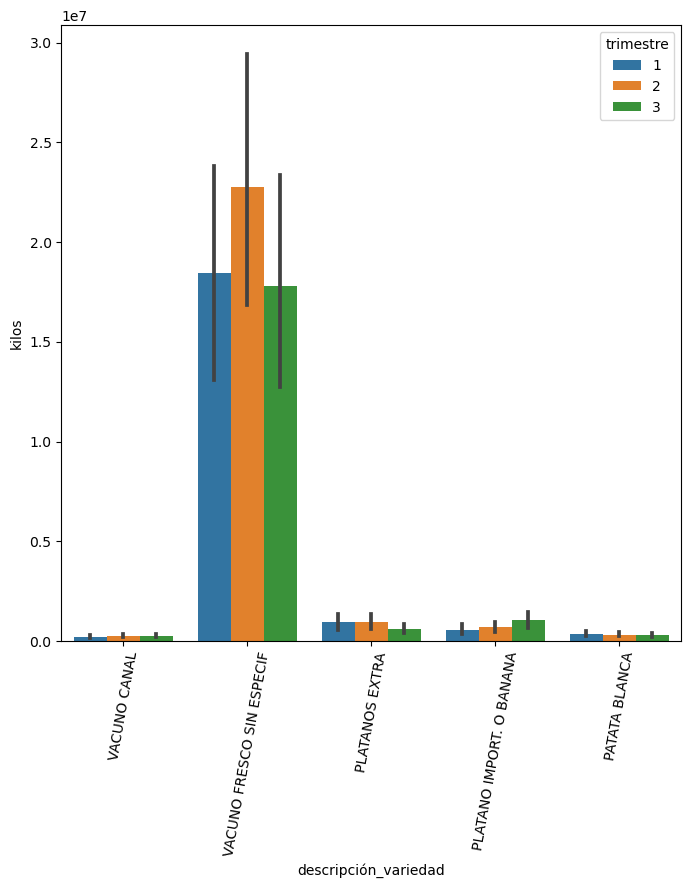

In [39]:
plt.figure(figsize = (8,8))
sns.barplot(data = df_top_productos, x= 'descripción_variedad', y = 'kilos', hue = 'trimestre')
plt.xticks(rotation = 80)
plt.show()


In [40]:
DEl top 5 destaca Vacuno fresco con gran diferencia conb demás categorias

SyntaxError: invalid syntax (2777405024.py, line 1)

# **Análisis vacuno**

In [ ]:
# Total de kilos
total_kilos = df_vacuno['kilos'].sum()
total_kilos

In [ ]:
# Top 5 ciudades con más producto
top5_kilos = df_vacuno.groupby('descripción_origen')['kilos'].sum().sort_values(ascending= False).head()
top5_kilos = top5_kilos.sum()
top5_kilos

In [ ]:
# Porcentaje de kilos TOP 5 sobre el total
porcentaje_top5 = (top5_kilos / total_kilos) * 100
print(f"El Top 5 de ciudades representa el {porcentaje_top5:.2f}% del total de las compras.")

In [ ]:
plt.figure(figsize = (20,20))
sns.barplot(data = df_vacuno, x = 'descripción_origen', y = 'kilos')
plt.xticks(rotation=80)
plt.show()

In [ ]:
df.sort_values(by ='var_precios', ascending= False).head(20)